# **PROJECT 10 (A): RFM (Recency Frequency Monetary) Analysis**
---
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?

Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.

1. Platinum customer - frequent and more revenue generator.
2. Gold customer - frequent but less revenue generator.
3. silver customer - less frequent and less revenue generator.

[Tham khảo chi tiết về phân tích RFM](https://bsdinsight.com/phan-tich-phan-khuc-khach-hang-voi-mo-hinh-rfm/)


In [2]:
#importing all important package..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Liên kết với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/My Drive/Colab Notebooks/10Project/Data10_RFM Analysis/data.csv"
data =pd.read_csv(path, encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
#Chỉ lấy dữ liệu của UK
df = data[data.Country=='United Kingdom']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


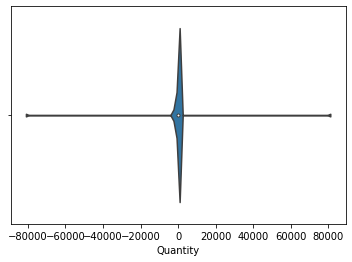

In [11]:
sns.violinplot(df.Quantity)

In [12]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [13]:
df[df.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [15]:
#Quantity không thể là số âm, thực hiện loại bỏ các giá trị âm
df = df[df.Quantity>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

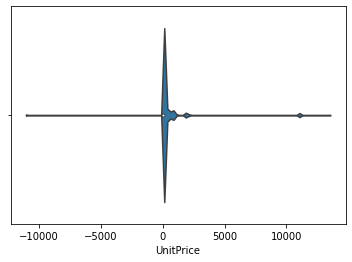

In [16]:
#Kiểm tra thuộc tính UnitPrice
sns.violinplot(df.UnitPrice)

In [17]:
#Lọc chỉ lấy dữ liệu UnitPrice>0
df = df[df.UnitPrice>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    485123 non-null  object 
 1   StockCode    485123 non-null  object 
 2   Description  485123 non-null  object 
 3   Quantity     485123 non-null  int64  
 4   InvoiceDate  485123 non-null  object 
 5   UnitPrice    485123 non-null  float64
 6   CustomerID   354321 non-null  float64
 7   Country      485123 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.3+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


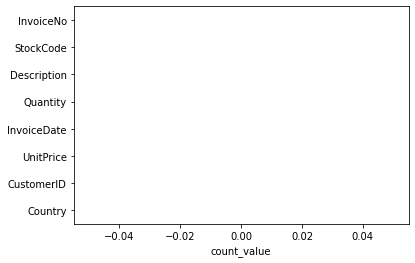

In [22]:
#checking null values in all columns in dataset
print(df.isnull().sum())
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(null_values.count_value,null_values.index)

In [20]:
#Loại bỏ các dòng dữ liệu chứa giá trị null
df.dropna(subset=['CustomerID'], how='all',inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## R - Xác định thông số Recency
---

In [23]:
#Xem ngày cuối cùng trong dữ liệu
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [24]:
df['InvoiceDate'].min()

'1/10/2011 10:32'

In [25]:
#Xem ngày cuối cùng trong dữ liệu như ngày hiện tại
import datetime as dt
now = dt.date(2011,12,9)

In [27]:
#Lấy dữ liệu ngày tháng trong cột InvoiceDate
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354321 non-null  object 
 1   StockCode    354321 non-null  object 
 2   Description  354321 non-null  object 
 3   Quantity     354321 non-null  int64  
 4   InvoiceDate  354321 non-null  object 
 5   UnitPrice    354321 non-null  float64
 6   CustomerID   354321 non-null  float64
 7   Country      354321 non-null  object 
 8   Date         354321 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 27.0+ MB


In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [30]:
#nhóm khách hàng theo ngày mua và lấy ngày mua sau cùng
#Từ đó xác định tham số Recency
recency_df = df.groupby(['CustomerID'],as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [31]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [32]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [33]:
recency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3919
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3920 non-null   float64
 1   LastPurchaseDate  3920 non-null   object 
 2   Recency           3920 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 122.5+ KB


In [34]:
recency_df.value_counts()

CustomerID  LastPurchaseDate  Recency
18287.0     2011-10-28        42         1
14673.0     2011-12-06        3          1
14670.0     2011-03-04        280        1
14669.0     2011-04-12        241        1
14667.0     2011-11-29        10         1
                                        ..
16460.0     2011-11-11        28         1
16458.0     2011-12-07        2          1
16457.0     2011-05-05        218        1
16456.0     2011-09-01        99         1
12346.0     2011-01-18        325        1
Length: 3920, dtype: int64

In [35]:
#Xóa thuộc tính LastPurchaseDate không sử dụng
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


## F - Xác định tham số Frequency
---

In [36]:
#Xác định xem khách hàng đã thực hiện bao nhiêu giao dịch
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'],keep="first",inplace=True)
frequency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16646 entries, 0 to 541890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    16646 non-null  object 
 1   StockCode    16646 non-null  object 
 2   Description  16646 non-null  object 
 3   Quantity     16646 non-null  int64  
 4   InvoiceDate  16646 non-null  object 
 5   UnitPrice    16646 non-null  float64
 6   CustomerID   16646 non-null  float64
 7   Country      16646 non-null  object 
 8   Date         16646 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [37]:
#Tính tổng số giao dịch của khách hàng
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


## M - Xác định tham số Monetary Value
---

In [38]:
df['Total_cost'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [39]:
#Tính tổng lượng tiền đã giao dịch
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns=['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


## Kết hợp dữ liệu R - F - M
---

In [41]:
#Ghép dữ liệu Recency với Frequency
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')
rf.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,209
3,12749.0,3,5
4,12820.0,3,4


In [42]:
#Ghép với dữ liệu Monetary
rfm = rf.merge(monetary_df, left_on='CustomerID',right_on='CustomerID')
rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,209,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34


## Thực hiện phân cụm khách hàng KMeans
---

In [43]:
rfm_segmentation = rfm.copy()


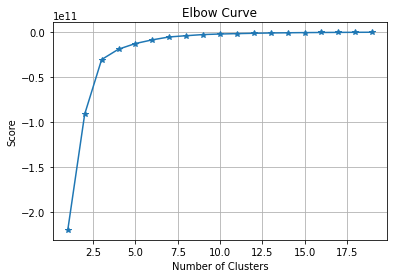

In [48]:
#Xác định số cụm tối ưu cho thuật toán KMeans
#Kiểm tra số cụm từ 1-20 tính score để xác định số cụm phù hợp
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score,marker='*')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid()
plt.title('Elbow Curve')
plt.show()

In [49]:
#Chọn số cụm K=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [50]:
#thêm nhãn cụm vào dữ liệu sau khi phân cụm
rfm_segmentation['cluster'] = kmeans.labels_
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,2
12747.0,2,11,4196.01,0
12748.0,0,209,33719.73,2
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0
12821.0,214,1,92.72,0
12822.0,70,2,948.88,0
12823.0,74,5,1759.50,0
12824.0,59,1,397.12,0


In [52]:
#Thống kê số lượng theo từng cụm
rfm_segmentation['cluster'].value_counts()

0    3887
2      30
1       3
Name: cluster, dtype: int64

In [55]:
#list danh sách cụm 0
rfm_segmentation[rfm_segmentation.cluster==0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747.0,2,11,4196.01,0
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0
12821.0,214,1,92.72,0
12822.0,70,2,948.88,0
12823.0,74,5,1759.50,0
12824.0,59,1,397.12,0
12826.0,2,7,1474.72,0
12827.0,5,3,430.15,0


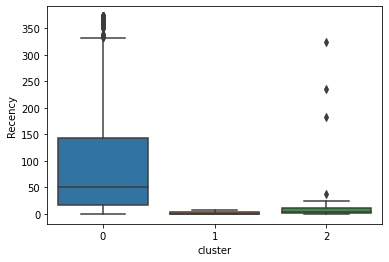

In [56]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

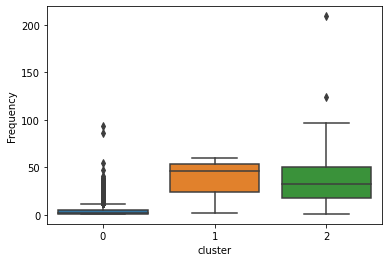

In [57]:
'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

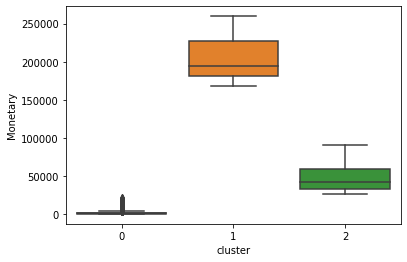

In [58]:
'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

In [53]:
#list danh sách cụm 1
rfm_segmentation[rfm_segmentation.cluster==1].head(10)


,Recency,Frequency,Monetary,cluster
CustomerID,,,,
16446.0,0,2,168472.50,1
17450.0,8,46,194550.79,1
18102.0,0,60,259657.30,1


In [54]:
#list danh sách cụm 2
rfm_segmentation[rfm_segmentation.cluster==2].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,2
12748.0,0,209,33719.73,2
12931.0,21,15,42055.96,2
13081.0,11,11,28337.38,2
13089.0,2,97,58825.83,2
13098.0,1,28,28882.44,2
13408.0,1,62,28117.04,2
13694.0,3,50,65039.62,2
13777.0,0,33,25977.16,2


### **KẾT LUẬN**
---
Dựa trên kết quả phân đoạn: 
* Cụm 0: Nhóm khách hàng Bạc (Silver customers)
* Cụm 1: Nhóm khách hàng Bạch Kim (Platinu customers)
* Cụm 2: Nhóm khách hàng Vàng (Gold customers)


## **Phân tích chi tiết RFM**
---


In [59]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [60]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,300.280
0.50,50.0,2.0,652.280
0.75,142.0,5.0,1576.585


In [61]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,325,1,77183.60,2,4,4,1
12747.0,2,11,4196.01,0,1,1,1
12748.0,0,209,33719.73,2,1,1,1
12749.0,3,5,4090.88,0,1,2,1
12820.0,3,4,942.34,0,1,2,2


In [62]:
quantile.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.28000000000003,
  0.5: 652.2800000000002,
  0.75: 1576.5850000000005},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [63]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441
12747.0,2,11,4196.01,0,1,1,1,111
12748.0,0,209,33719.73,2,1,1,1,111
12749.0,3,5,4090.88,0,1,2,1,121
12820.0,3,4,942.34,0,1,2,2,122


In [64]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score 
between 3 and 12. Here the sdvantage is that each of the scores got same importance. However some scores 
will have many sgements as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + \
                                rfm_segmentation['F_Quartile'] + \
                                rfm_segmentation['M_Quartile']

rfm_segmentation.head()


,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,209,33719.73,2,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


In [65]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  187
Lost Cheap Customers:  396


In [66]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])


,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
18102.0,0,60,259657.30,1,1,1,1,111,3
17450.0,8,46,194550.79,1,1,1,1,111,3
17511.0,2,31,91062.38,2,1,1,1,111,3
16684.0,4,28,66653.56,2,1,1,1,111,3
14096.0,4,17,65164.79,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17102.0,261,1,25.50,0,4,4,4,444,12
15823.0,372,1,15.00,0,4,4,4,444,12
17763.0,263,1,15.00,0,4,4,4,444,12


In [67]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111     8443.319409
112     1241.785577
113      443.086667
114      201.120000
121     2482.559268
           ...     
434      208.722982
441    14665.555000
442      942.920313
443      402.421137
444      158.611742
Name: Monetary, Length: 61, dtype: float64

In [68]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

Total_score
3     8443.319409
4     3476.003567
5     2334.664483
6     1396.382037
7     1129.331281
8      695.442278
9      704.139754
10     363.057451
11     280.865560
12     158.611742
Name: Monetary, dtype: float64

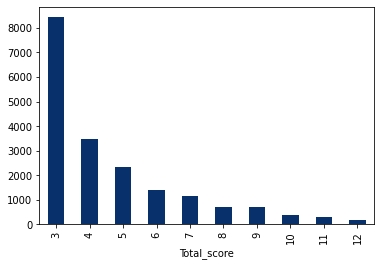

In [69]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

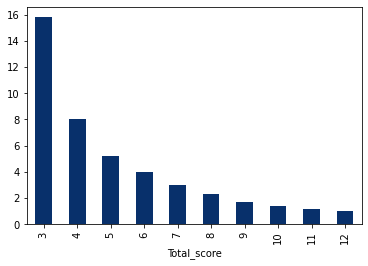

In [70]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

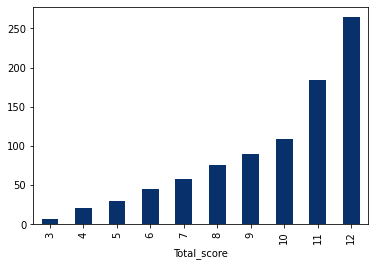

In [71]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')